## Analysis that highlights your experimental hypothesis.

For this part, I will look at the count of actors in starring and supporting roles, as well as their return. 
While my data set does not have information about salary, these visuals will serve as a base of analysis, to inform questions and problems that can be further explored and examined through adaditional work.

### The Problem
A movie studio is working on its yearly budget allocation for planned film production. Over the past couple of years, there has been much debate about the salaries they pay their actors. Looking at the returns of their actors in the past, they have found that the price they pay does not always translate into box office success. For the upcoming year, they want to understand if the viewing public actually care about what actors are in a film, and if this affects their decision to see a movie. This will help inform them whether the actors should be making the big money they currently take in for each film.

In a world where Rotten Tomato Scores often play a significant role in determining whether someone sees a film, its important that this experiment is run for 'upcoming' releases, that have not been reviewed yet. Therefore, when surveying moviegoers, the only details they know are the descriptions, and for the treatment group, the actors. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json 
from numpy import inf
%matplotlib inline


import seaborn as sns

from scipy import stats

In [2]:
#the below is code taken from the pre-course capstone, to clean the csv files, and get my data into 
#a usable dataframe
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
def index_key_fix(colval, index_val):
    # return missing value rather than an error upon indexing/key failure
    try:
        out=colval[index_val[0]][index_val[1]]
        return out
    except IndexError or KeyError:
        return pd.np.nan
    
def delimit_tmdb_movies(file):
    df = pd.read_csv(file)
    json_columns = ['genres']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def delimit_tmdb_credits(file):
    df = pd.read_csv(file)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

#here i am pulling out the desired actor and genre fields I am interested in.
def combine_df(movies, credits):
    tmdb_500_movies = movies.copy()
    tmdb_500_movies['actor_1'] = credits['cast'].apply(lambda x: index_key_fix(x, [0, 'name']))
    tmdb_500_movies['actor_2'] = credits['cast'].apply(lambda x: index_key_fix(x, [1, 'name']))
    tmdb_500_movies['actor_3'] = credits['cast'].apply(lambda x: index_key_fix(x, [2, 'name']))
    tmdb_500_movies['genre_1'] = tmdb_500_movies['genres'].apply(lambda x: index_key_fix(x, [0, 'name']))
    tmdb_500_movies['genre_2'] = tmdb_500_movies['genres'].apply(lambda x: index_key_fix(x, [1, 'name']))
    tmdb_500_movies['genre_3'] = tmdb_500_movies['genres'].apply(lambda x: index_key_fix(x, [2, 'name']))
    return tmdb_500_movies

#Time to combine into one dataframe
credits = delimit_tmdb_credits("tmdb_5000_credits.csv")
movies = delimit_tmdb_movies("tmdb_5000_movies.csv")
df_combine = combine_df(movies, credits)


In [4]:
#I know that there are many instances of zero values for budget and revenue.
#I want to replace 0 values with nan for budget and revenue, and will caveat that these were most likely 
#smaller movies in the first place.
#I also want to make them both into floats. 

df_combine['revenue'] = pd.to_numeric(df_combine['revenue'], errors='coerce').astype(float)
df_combine['budget'] = pd.to_numeric(df_combine['budget'], errors='coerce').astype(float)
df_combine['revenue'] = df_combine['revenue'].replace(0,np.nan)
df_combine['budget'] = df_combine['budget'].replace(0,np.nan)

#I also want to replace missing values for actors and genres with nan.
df_combine['actor_1'] = df_combine['actor_1'].replace(0,np.nan)
df_combine['actor_2'] = df_combine['actor_2'].replace(0,np.nan)
df_combine['actor_3'] = df_combine['actor_3'].replace(0,np.nan)
df_combine['genre_1'] = df_combine['genre_1'].replace(0,np.nan)
df_combine['genre_2'] = df_combine['genre_2'].replace(0,np.nan)
df_combine['genre_3'] = df_combine['genre_3'].replace(0,np.nan)

#convert budget and revenue into millions
df_combine.loc[:,'budget'] = round((df_combine['budget'] /10**6),2)
df_combine.loc[:,'revenue'] = round((df_combine['revenue'] /10**6),2)
df_combine =df_combine.rename(columns={'budget':'budget_M','revenue':'revenue_M'})

#Per the logic of the function above, I only want to look at films that have
#non-null values for both revenue and budget. 
#I am going to make a new dataframe to reflect this, that I can use moving forward. 
df_clean_RB= df_combine[(df_combine['budget_M'].notnull()) & (df_combine['revenue_M'].notnull())]

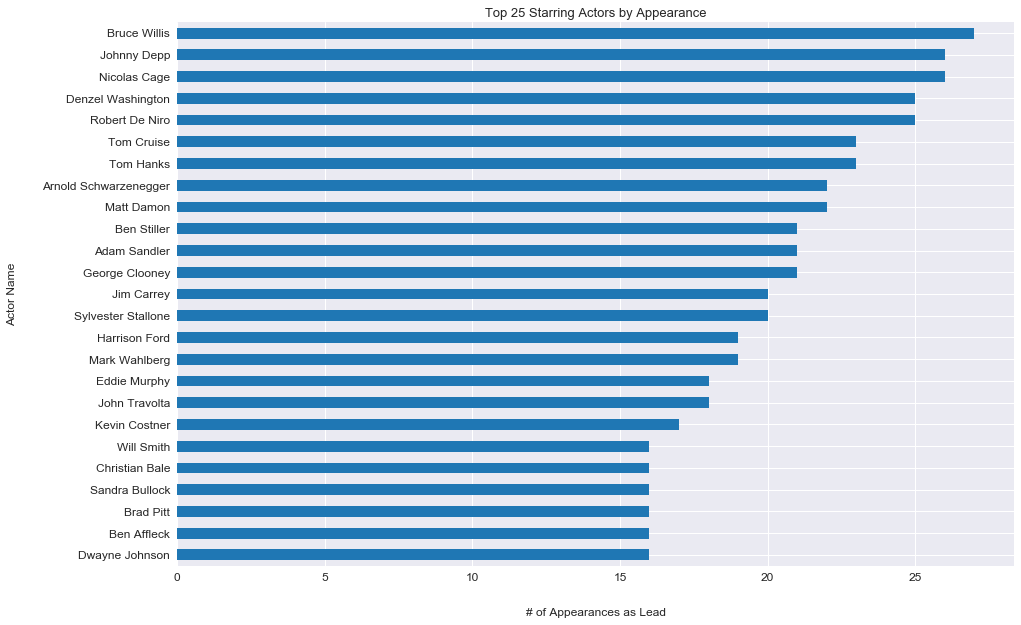

In [10]:
#now i want to look at the count of actors in starring roles or supporting roles
#for the sake of this exercise, I am only going to look at actor in position 1 (starring) and 2 (main supporting or co-starring)
#I could combine all actors listed in the credits, but I am interested in seeing if the top billed actors are worth what they 
# are being paid
df_actor1_data = df_clean_RB.copy()
df_actor1_data['counter']=1
df_actor1_data= df_actor1_data.groupby('actor_1')['revenue_M','budget_M','counter'].agg(['sum'])
df_actor1_data.columns =['total_revenue','total_budget','actor_1_count']
df_actor1_data['return'] = df_actor1_data['total_revenue']/df_actor1_data['total_budget']
#In order to keep the same actors when looking at revenue and return, I will sort by count and then revenue to get my top 25
actor1_count_top25= df_actor1_data.sort_values(['actor_1_count','total_revenue'],ascending =[False,False]).head(25)

count_col = ['actor_1_count']
actor1_count_top25.plot.barh(y=count_col, color='#1f77b4', legend=False)
plt.xlabel('# of Appearances as Lead', fontsize=12, labelpad=25)
plt.ylabel('Actor Name', fontsize=12, labelpad=25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Top 25 Starring Actors by Appearance", fontsize=13)
plt.rcParams["figure.figsize"] = (15,10)
plt.gca().invert_yaxis()
plt.show()

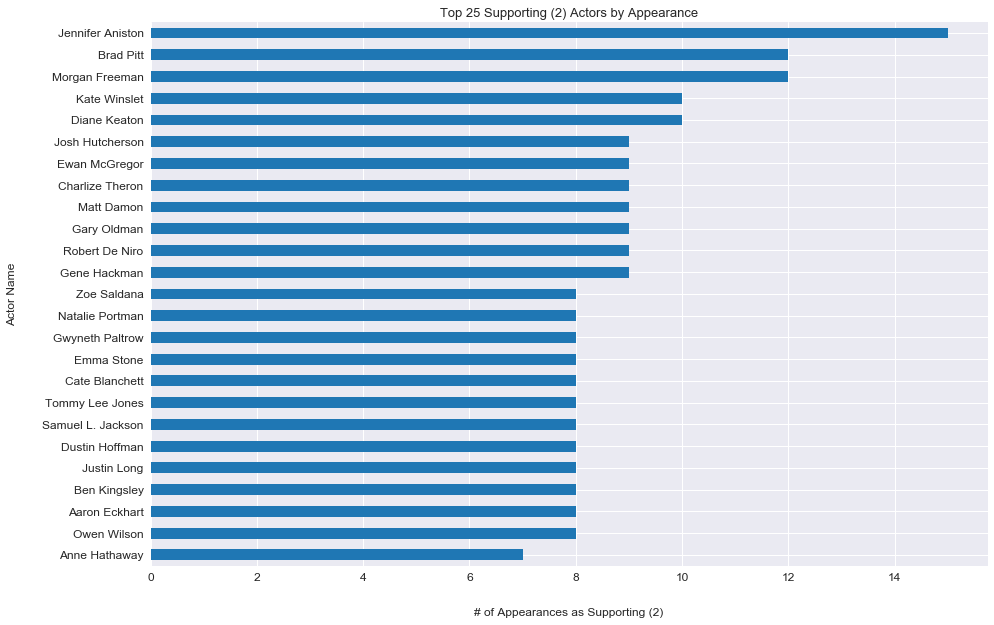

In [6]:
df_actor2_data = df_clean_RB.copy()
df_actor2_data['counter']=1
df_actor2_data= df_actor2_data.groupby('actor_2')['revenue_M','budget_M','counter'].agg(['sum'])
df_actor2_data.columns =['total_revenue','total_budget','actor_2_count']
df_actor2_data['return'] = df_actor2_data['total_revenue']/df_actor2_data['total_budget']
#In order to keep the same actors when looking at revenue and return, I will sort by count and then revenue to get my top 25
actor2_count_top25= df_actor2_data.sort_values(['actor_2_count','total_revenue'],ascending =[False,False]).head(25)

count_col = ['actor_2_count']
actor2_count_top25.plot.barh(y=count_col, color='#1f77b4', legend=False)
plt.xlabel('# of Appearances as Supporting (2)', fontsize=12, labelpad=25)
plt.ylabel('Actor Name', fontsize=12, labelpad=25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Top 25 Supporting (2) Actors by Appearance", fontsize=13)
plt.rcParams["figure.figsize"] = (15,10)
plt.gca().invert_yaxis()
plt.show()

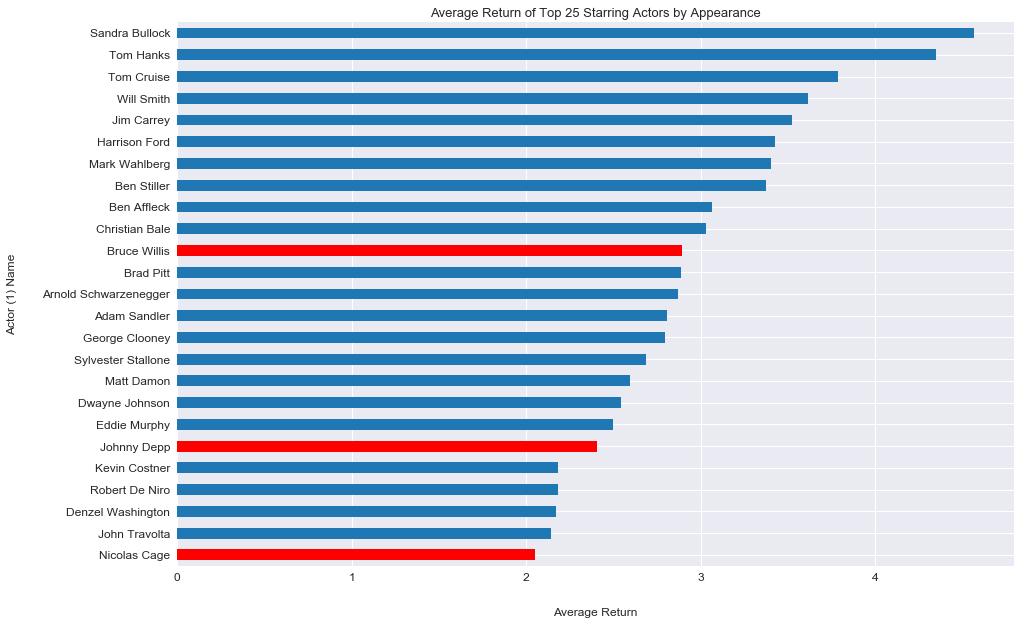

In [7]:
# now I want to look at return, paying attention to the return of the most common appearing actors 
#in position 1 and 2
df_actor1_return= df_actor1_data.sort_values(['actor_1_count','total_revenue'],ascending =[False,False]).head(25)
df_actor1_return= df_actor1_return.sort_values(['return'],ascending =False)

df_actor1_return['top_3'] =(df_actor1_return.index=='Bruce Willis') | \
                                           (df_actor1_return.index=='Nicolas Cage') | \
                                           (df_actor1_return.index=='Johnny Depp')
ret_val = ['return']
df_actor1_return.plot.barh(y=ret_val, color=df_actor1_return.top_3.map({True: 'r', False: '#1f77b4'}),legend=False)
plt.title("Average Return of Top 25 Starring Actors by Appearance", fontsize=13)
plt.xlabel('Average Return', fontsize=12, labelpad=25)
plt.ylabel('Actor (1) Name', fontsize=12, labelpad=25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.rcParams["figure.figsize"] = (15,10)
plt.gca().invert_yaxis()
plt.show()

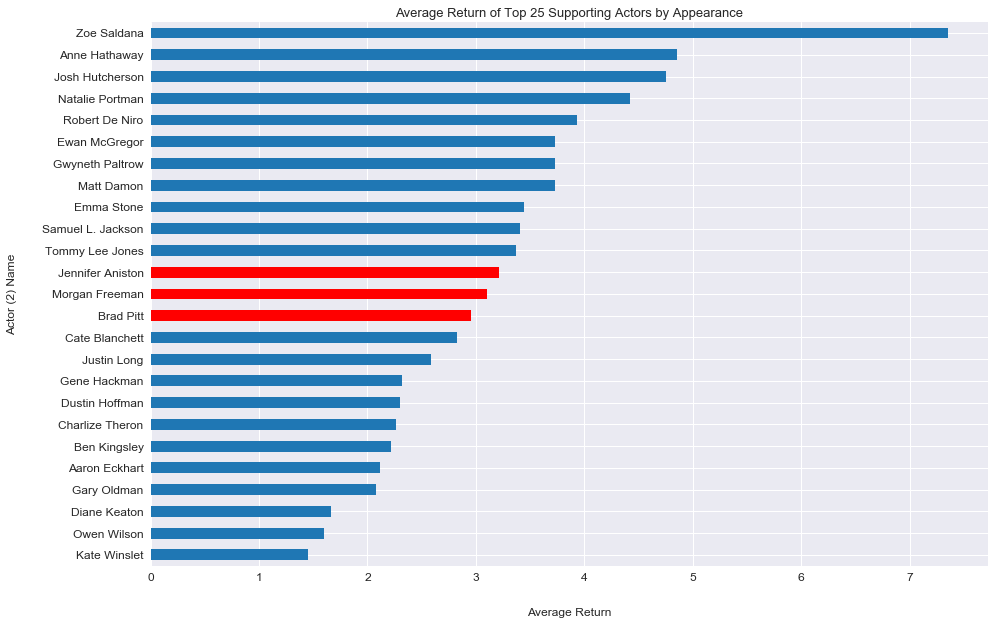

In [8]:
df_actor2_return= df_actor2_data.sort_values(['actor_2_count','total_revenue'],ascending =[False,False]).head(25)
df_actor2_return= df_actor2_return.sort_values(['return'],ascending =False)

df_actor2_return['top_3'] =(df_actor2_return.index=='Jennifer Aniston') | \
                                           (df_actor2_return.index=='Brad Pitt') | \
                                           (df_actor2_return.index=='Morgan Freeman')
ret_val = ['return']
df_actor2_return.plot.barh(y=ret_val, color=df_actor2_return.top_3.map({True: 'r', False: '#1f77b4'}),legend=False)
plt.title("Average Return of Top 25 Supporting Actors by Appearance", fontsize=13)
plt.xlabel('Average Return', fontsize=12, labelpad=25)
plt.ylabel('Actor (2) Name', fontsize=12, labelpad=25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.rcParams["figure.figsize"] = (15,10)
plt.gca().invert_yaxis()
plt.show()

In [9]:
print(df_actor1_return.dropna().describe())
print(df_actor2_return.dropna().describe())

       total_revenue  total_budget  actor_1_count     return
count      25.000000      25.00000      25.000000  25.000000
mean     3822.060400    1289.53680      20.360000   2.953673
std      1551.689018     416.51897       3.604164   0.671508
min      1866.510000     782.50000      16.000000   2.049776
25%      2827.310000     992.00000      17.000000   2.498682
50%      3494.100000    1135.00000      20.000000   2.869759
75%      3916.470000    1521.82000      23.000000   3.403317
max      7570.390000    2626.50000      27.000000   4.566850
       total_revenue  total_budget  actor_2_count     return
count      25.000000     25.000000      25.000000  25.000000
mean     1699.688800    523.696000       9.000000   3.175767
std       920.182565    188.800833       1.732051   1.287490
min       596.820000    226.900000       7.000000   1.455703
25%       874.050000    377.250000       8.000000   2.267390
50%      1843.300000    510.000000       8.000000   3.103199
75%      2186.850000    

From the above visualization, it is clear that the number of films an actor is in does not always translate into returns. 
This especially the case for the top billed actors (in starring roles). For example, the return of the most common top-billed actors, Johnny Depp, Bruce Willis, and Nicolas Cage, you can see that their returns are less than the average return of the top 25 group. The same can be said about the top appearing actors in position 2. 

Also interesting is the average return of the top 25 appearing actors in supporting roles is higher than that of the top billed actors. This poses the question: is it worth paying starring actors top dollar? From the visuals, it appears that actors can have an impact on the success of a film. But to what extent and how can movie studios quantify this impact when deciding what to pay their actors?  This motivates the question I want to answer with my experiment: what is the value of actors to moviegoers? Do they see a film based on who is in it? 



## A rollout plan showing how you would implement and rollout the experiment

### Potential Solution
Proposed Hypothesis: In surveying moviegoers about upcoming releases, informing them about the actors that will be in the film (along with a description) will increase their desire to see the film, by 10% more than moviegoers that are just told a film description.

### The method of testing the solution


- Two versions: 
    - Control group that hears a film description but does not hear what actor is in the film
    - Test group that hears the description with the actor that is in the film


- Experiment set up: 
    - I will be surveying moviegoers about whether they are interested in seeing a movie after being told a description ( which has 1 actor attached for the treatment group). The number of actors and descriptions, as well as survey locations will be determined by calculating a sample size. The optimal sample size wil inform the count of the other variables selected, based on ability to achieve the sample number in terms of resource and cost restraints

    


In [14]:
#in order to pick the right sample size, I need to estimate the unkown quantities, i.e. std and se. 

#because the survey will consist of yes or no responses (1 or 0), I will make the assumption that the std of the population is 0.5

#starting with the t_stat equation:
#t_stat = (mean1-mean2)/sqrt(var1/N1 + var2/N2)
#assuming equal variance, this becomes
#t_stat = (mean1-mean2)/sqrt(2*var1) = (mean1-mean2)/(sqrt(2/N) * STD) = sqrt(N/2) * (mean1-mean2)/STD 

#estimate sample std
sample_std = np.std([0,1]*100, ddof=1) #sample std. 

#to guess n (for each group, i.e. 1 description and 1 actor pairing), I need to estimate the standard error
#I also need to select a resolution of error, or the effect I want to see. I will use 10% as my effect size. 
effect_size = 0.1
#Next, I want to select a confidence level, so I will use 95% (i.e a p-value of 0.05)
#To get p value of .05, I would need the difference between the means of the two groups to be a certain amount of 
#standard errors apart (t-value)..I will estimate a t-stat around 3 based on the validation done in the appendix: 
t_stat = 3
#using effect size and t_stat, calculate s.e
sample_se = effect_size/t_stat

n = 2*(sample_std/(sample_se))**2
print("The sample size of 1 group is:{}".format(round(n,0)))

The sample size of 1 group is:452.0


1 group is defined as the sample size for 1 description (and for the treatment group the pairing of 1 description and 1 actor)
So for 1 description, there will be 460 (rounded for ease in divisibility) surveys for the control group and 460 surveys for the treatment group. As moviegoers have different affinities to different genres, I want to have multiple descriptions, from multiple genres. The same goes for actors. I would want to test with more than 1 actor, and create different combinations of actor and description. 
With this in mind, the sample size of the entire experiment is calculated below. As previously mentioned, the count of the variables selected will be selected so that it is reasonable to collect enough surveys to reach the optimal sample size based on resource and cost constraints.

In [38]:
#calculate size using treatment. The control size will equal that of the treatment size
#going to start with 3 descriptions (still asumming a single actor attached to each)
groupsize_3_desc = 460 * 3 
print("The sample size of the treatment group for 3 descriptions and 1 actor is:{}".format(groupsize_3_desc))

#will calculate the same for 5 descriptions
groupsize_5_desc = 460 * 5 
print("The sample size of the treatment group for 5 descriptions and 1 actor is:{}".format(groupsize_5_desc))
print('\n')
#now I want to add more than 1 actor. I will try with 5 to start, and then 10
#3 descriptions
groupsize_5_actors_3_desc = groupsize_3_desc * 5
groupsize_10_actors_3_desc= groupsize_3_desc * 10

print("The sample size of the treatment group for 3 descriptions and 5 actors is:{}".format(groupsize_5_actors_3_desc))
print("The sample size of the treatment group for 3 descriptions and 10 actors is:{}".format(groupsize_10_actors_3_desc))

#5 descriptions
groupsize_5_actors_5_desc = groupsize_5_desc * 5
groupsize_10_actors_5_desc= groupsize_5_desc * 10
print("The sample size of the treatment group for 5 descriptions and 5 actors is:{}".format(groupsize_5_actors_5_desc))
print("The sample size of the treatment group for 5 descriptions and 10 actors is:{}".format(groupsize_10_actors_5_desc))

The sample size of the treatment group for 3 descriptions and 1 actor is:1380
The sample size of the treatment group for 5 descriptions and 1 actor is:2300


The sample size of the treatment group for 3 descriptions and 5 actors is:6900
The sample size of the treatment group for 3 descriptions and 10 actors is:13800
The sample size of the treatment group for 5 descriptions and 5 actors is:11500
The sample size of the treatment group for 5 descriptions and 10 actors is:23000


OK, so if i had 5 descriptions, and 10 actors I would need a total experiment size of 46,000 (23,000 times 2).
This would be hard to collect, especially if I am only polling at a certain amount of theaters, and I dont want to conduct this over too many weeks, as there is seasonality in moviegoing. 
I will go with 3 descriptions and 5 actors for a total experiment size of 13,800 (6,900 times 2).
Below is the experimental design, continued...

- From the latest list of top earning actors, randomely select 5 actors from a combined list of the top earning Male actors and top earning Female actresses. This helps control for the disparate difference between wages for actors and actresses. 
- Using text and language processing, 3 movie descriptions will be created (for each of the 3 most common genres)
     - The movie descriptions will be very generic, using common and general words and phrases that are typically found in a movie description of a given genre. 
      - While it is likely that the description itself could influence the decision to watch a movie, the impact of the description should be minimal as the both the control and treatment group will get the same description, with the latter having the actor listed. 
- From the list of 5 actors and actresses, there will be 1 actor randomely assigned for each description.
     - Each actor will appear in each of the 3 descriptions 460 number of times in an effort to reduce potential bias that the assignment of the actor and description could introduce. There could be possible interplay between an actor and dscription, i.e. a certain actor could be more of an action star than comedic actor, thus moviegoers might not positively associate them with comedies. 
- The survey will be conducted at 10 popular movie theaters (in LA) over the course of 5 consecutive Saturday afternoons. 10 theaters were selected so that the ideal sample size I calculated can be achieved. Also, I would want the theaters to be in the same general location so the sample is geographically and demographically similar.
     - The time of the year will be in the summer, a period where there are new blockbuster releases every week, so there will likely be similar samples of people over the 5 weekends. This will also ensure that there will be enough people at the theather for survey collection. Also, moviegoers in the summer are more indicative of the general population of movie goers.
- Based on the above calculations to estimate sample size, the treatment and control groups will each consist of 6,900 people
     - For each weekend, at each theater 276 people will be surveyed, 138 in the control group and 138 in the treatment group. 
     - The number of surveys for each description will be the same for each theatre, split 50/50 between the control and treatment versions. Each theatre should have close to an equal amount of actor/description combinations. 
     - Prior to conducting the survey, for each theatre, the order of the descriptions (with treatment and control) should be randomely shuffled.
     - The survey will be 1 question (not including identifying questions). The observer will ask people to take part of a quick survey about movie attenednce. The oberver will read the description (the treatment group will have the actor listed in the description), and then they will ask the moviegoer if they are likely to see the film. 
     - The survey will also consist of a few quick identifying questions to understand if there is bias in the population. If so, I would need to correct for this. The question would include age, income, political affiliation, neighborhood and questions about the frequency of movie going.
         - I would want to check if the distributions of these variables are similar to that of the distribution of the population for each quantity.
         - I could also do some regression analysis or significance testing to see if these variables have any explantory value to the findings from the experiment.
     - If a person in the control group asks who is in the movie, the observer cannot address (or any other question for that matter), and will record this down. 


## An evaluation plan showing what constitutes success in this experiment

To evaluate success in this experiment, I am looking to disprove my null hypothesis, that the number of yes responses for the treatment group is less than 10% more than that of the control group. 

Prior to conducting statistical tests about my responses, I would first want to look at the responses of the identifying questions. As mentioned above, I would compare the distributions of the variables in my sample to that of the population (data acquired thorugh research). I would also run regression analysis and signigicance testing to see if any of the variables have explantory value to the results I achieved. This would help guide the interpretation of the final results. 

I would do so with t-test and anova test(Note for each test, I would calculate the means, variance, std, se of the groups being examined: 
           
- Primary: 2 sample t-test comparing the mean of the responses in the treatment group to the mean of the responses in the control group.
- Secondary: Since I have multiple descriptions with multiple pairings of actor and description, I would need to see if there is any statistical significance between the mean responses for each description and each actor. This is important, as it will allow me to prove whether the my interpretation of the primary t-test is accurate, and does not have any lurking variables.
    - 1 way anova test to compare the mean of responses for each description, for both the control and treatment groups
    - 2 way anova test to compare the mean of responses for each description and the 5 actors listed for that description (treatment only) 
       - Looking at actor and description simultaneously will allow me to see if certain actors of a certain description have any explanatory power. 
    - 1 way anova test to compare compare the mean of responses between each actor (treatment only)

    
With all the info I have (from the various combinations of actors and descriptions), I can also conduct some regression analysis to identify the most important predictor of a yes response (if there is one). This could also impact the way I need to interpret my results. It would also give the movie studio additional information about moviegoers desire to see a film (like a genre, or a certain actor paired with a certain genre). 

## Appendix

In [40]:
from scipy import stats
import numpy as np
from collections import defaultdict

p_values = defaultdict(lambda: 0)  # dictionary with a default value of 0 for non-existent keys

for N in range(100,500,50):  # different values for sample size
    # repeat the experiment many times (p-value will differ from trial to trial)
    for i in range(1000): 
        samples_control = np.where(np.random.uniform(size=N)>.5, 1, 0)
        samples_treatment = np.where(np.random.uniform(size=N)>.6, 1, 0) #effect size. 
        #some % of people to say yes (10% relative increase)
        
        # do a t-test, store the value
        t_stats = stats.ttest_ind(samples_control,samples_treatment,equal_var=True) 
        p_values[N] += np.array(t_stats)
    p_values[N]/=1000
    print("sample size of one group: {}, t-statistic: {:.2f}, p-value: {:.3f}.".format(N, 
                                                                                       p_values[N][0],
                                                                                       p_values[N][1]))
#The size of 450 roughly gives me the t-stat I was looking for (although the p-value was slightly overestimated above)

sample size of one group: 100, t-statistic: 1.46, p-value: 0.258.
sample size of one group: 150, t-statistic: 1.78, p-value: 0.193.
sample size of one group: 200, t-statistic: 2.03, p-value: 0.147.
sample size of one group: 250, t-statistic: 2.26, p-value: 0.102.
sample size of one group: 300, t-statistic: 2.52, p-value: 0.073.
sample size of one group: 350, t-statistic: 2.68, p-value: 0.058.
sample size of one group: 400, t-statistic: 2.83, p-value: 0.044.
sample size of one group: 450, t-statistic: 3.00, p-value: 0.032.
